### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
from scipy.stats import skew
import nbimporter
from collections import Counter
from Functions import calculate_descriptives, descriptive_stats

# Load Data

In [6]:
df1 = pd.read_csv('C://Users/halee/Downloads/events_table2024.csv')
df2 = pd.read_csv('C://Users/halee/Downloads/drugs_table2024_prep.csv')
# Merge df1 and df2
merged_df1_df2 = pd.merge(df1, df2, on='event_id', how='inner')
merged_df1_df2.drop(['patient_drug_id'], axis = 1, inplace = True)
merged_df1_df2.drop_duplicates(inplace=True)
primary_data2024 = merged_df1_df2
primary_data2024.head()

,event_id,year,expedited,report_source,country,age,sex,weight,serious_outcome,company_name,spl_set_id,ingredients,med_product,generic_name,manufacturers,manu_num,rxcui,unii,ndc9
0,1,2024,1,1,ca,39.0,2,112.00,1,['roche'],7f6a2191-adfb-48b9-9bfa-0d9920479f0d,['omalizumab'],['xolair'],['omalizumab'],['genentech'],1,1657209.0,['2P471X1Z11'],502420040.0
55,2,2024,1,1,ca,57.0,1,74.00,1,['roche'],7f6a2191-adfb-48b9-9bfa-0d9920479f0d,['omalizumab'],['xolair'],['omalizumab'],['genentech'],1,1657209.0,['2P471X1Z11'],502420040.0
82,2,2024,1,1,ca,57.0,1,74.00,1,['roche'],281ab967-7565-4bef-9c0c-a646589c671e,['prednisone'],['prednisone'],['prednisone'],"['horizon-therapeutics-', 'ani-pharmaceuticals...",12,1303125.0,['VB0R961HZT'],759870020.0
83,3,2024,2,1,us,44.0,2,61.22,1,['shire'],8d27a608-3ba1-4799-be38-c00fb08ce3ce,['mesalamine'],['mesalamine'],['mesalamine'],"['teva-pharmaceuticals-', 'allergan', 'sun-pha...",29,825130.0,['4Q81I59GXC'],9309224.0
86,4,2024,1,3,ca,65.0,2,57.00,1,['roche'],2e5365ff-cb2a-4b16-b2c7-e35c6bf2de13,['tocilizumab'],['actemra'],['tocilizumab'],['genentech'],1,1441527.0,['I031V2H011'],502420135.0


In [4]:
primary_data2024.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65972 entries, 0 to 146566
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   event_id         65972 non-null  int64  
 1   year             65972 non-null  int64  
 2   expedited        65972 non-null  int64  
 3   report_source    65972 non-null  int64  
 4   country          65972 non-null  object 
 5   age              65972 non-null  float64
 6   sex              65972 non-null  int64  
 7   weight           65972 non-null  float64
 8   serious_outcome  65972 non-null  int64  
 9   company_name     62234 non-null  object 
 10  spl_set_id       54688 non-null  object 
 11  ingredients      65972 non-null  object 
 12  med_product      65972 non-null  object 
 13  generic_name     54688 non-null  object 
 14  manufacturers    54688 non-null  object 
 15  manu_num         65972 non-null  int64  
 16  rxcui            53370 non-null  float64
 17  unii            

In [68]:
primary_data2024['serious_outcome']=primary_data2024['serious_outcome'].replace({0: 'NonSerious',
                                                                                1: 'Serious',
                                                                                2: 'Death'})

In [69]:
primary_data2024['serious_outcome'].value_counts()

serious_outcome
Serious       45776
Death         17849
NonSerious     2347
Name: count, dtype: int64

# Exploratory Data Analysis

### Load in Dataframes

In [2]:
documents_table = pd.read_csv('C://Users/halee/Downloads/documents_table.csv')
documents_table.head()

,id,doc_id,doc_type,year,drug,off label use,nausea,diarrhoea,fatigue,pyrexia,...,fulminant type 1 diabetes mellitus,benign prostatic hyperplasia,inability to afford medication,erythema of eyelid,nerve injury,visual acuity reduced,tooth fracture,blood albumin decreased,bronchiolitis,blood magnesium decreased
0,1,1,pr,2014,tobacco,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,pr,2014,siltuximab,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,2,pr,2014,indica,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,2,pr,2014,tobacco,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,2,pr,2014,phenolphthalein,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# Adjust pandas settings to display more rows
pd.set_option('display.max_rows', None)

# Get value counts
documents_table['drug'].value_counts()

drug
tobacco                610
indica                 193
glucose                 30
insulin                 29
paclitaxel              10
sildenafil              10
pioglitazone            10
metformin                9
penicillin               9
estrogen                 9
warfarin                 9
docetaxel                9
everolimus               8
testosterone             8
morphine                 7
rutin                    7
methotrexate             7
glycerin                 7
nitroglycerin            7
acetaminophen            6
imatinib                 6
menthol                  6
progesterone             6
bevacizumab              6
trastuzumab              6
acetaminophe             6
aspirin                  6
vancomycin               6
oxycodone                6
tyrosine                 6
glimepiride              6
ritonavir                5
peginterferon            5
ribavirin                5
ipilimumab               5
sunitinib                5
efavirenz              

### Investigate most common drugs, referenced in historical documents

In [3]:
# Filter out rows where the drug is 'tobacco' or 'indica'
filtered_documents = documents_table[~documents_table['drug'].isin(['tobacco', 'indica'])]

# Get the top 10 drugs by value counts
top_drugs = filtered_documents['drug'].value_counts().head(10)

top_drugs = top_drugs.reset_index().rename(columns={0: 'drug', 1: 'count'})

In [4]:
top_drugs

,drug,count
0,glucose,30
1,insulin,29
2,paclitaxel,10
3,sildenafil,10
4,pioglitazone,10
5,warfarin,9
6,metformin,9
7,docetaxel,9
8,penicillin,9
9,estrogen,9


C:\Users\halee\AppData\Local\Temp\ipykernel_90272\2018472971.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='drug', data=top_drugs, palette='viridis')


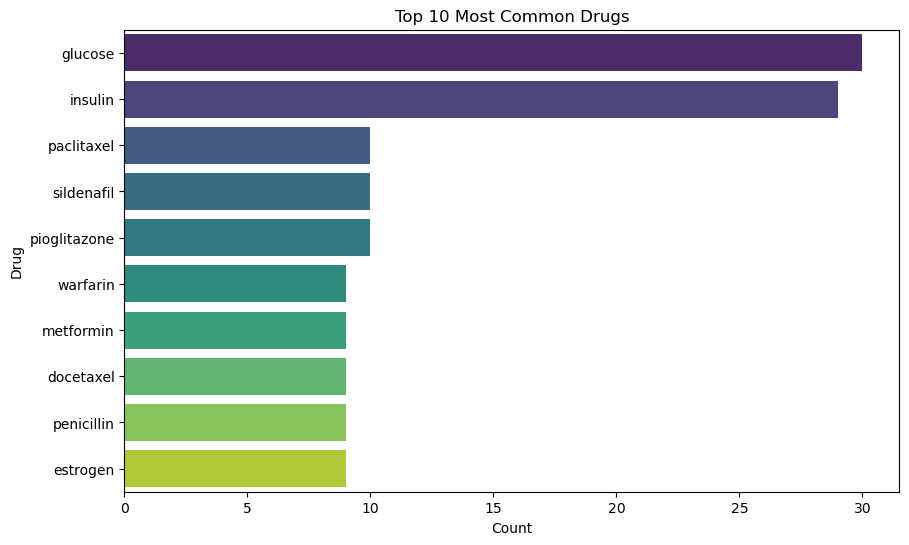

In [5]:
# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='drug', data=top_drugs, palette='viridis')
plt.title('Top 10 Most Common Drugs')
plt.xlabel('Count')
plt.ylabel('Drug')
plt.show()

### Investigate most common reactions, referenced in historical documents

C:\Users\halee\AppData\Local\Temp\ipykernel_30344\4104292016.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reactions.values, y=top_reactions.index, palette='magma')


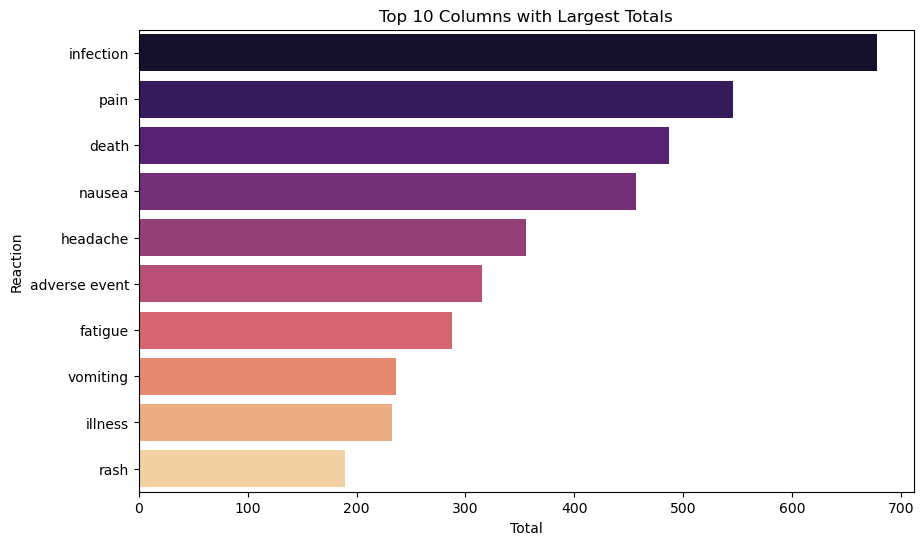

In [41]:
reaction_cols = documents_table.drop(columns=['id', 'doc_id','doc_type', 'year', 'drug']).sum()
top_reactions = reaction_cols.nlargest(10)


# Plotting with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_reactions.values, y=top_reactions.index, palette='magma')
plt.title('Top 10 Columns with Largest Totals')
plt.xlabel('Total')
plt.ylabel('Reaction')
plt.show()

In [7]:
documents_table.head()

,doc_id,doc_type,year,drug,drug administration error,overdose,drug hypersensitivity,rhinorrhoea,unevaluable event,malaise,...,asphyxia,lymphocyte percentage decreased,blood pressure diastolic increased,aspiration,neutrophil percentage increased,eosinophil percentage decreased,supraventricular tachycardia,radiation skin injury,hypokalaemia,all_reactions
0,1,pr,2006,equate,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,['tic']
1,2,pr,2006,equate,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"['seizure', 'tic']"
2,3,talk,1991,axe,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,['investigation']
3,3,talk,1991,air,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,['investigation']
4,3,talk,1991,air,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,['investigation']


C:\Users\halee\AppData\Local\Temp\ipykernel_30344\908104875.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reactions.values, y=top_reactions.index, ax=ax, palette='magma')
C:\Users\halee\AppData\Local\Temp\ipykernel_30344\908104875.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reactions.values, y=top_reactions.index, ax=ax, palette='magma')


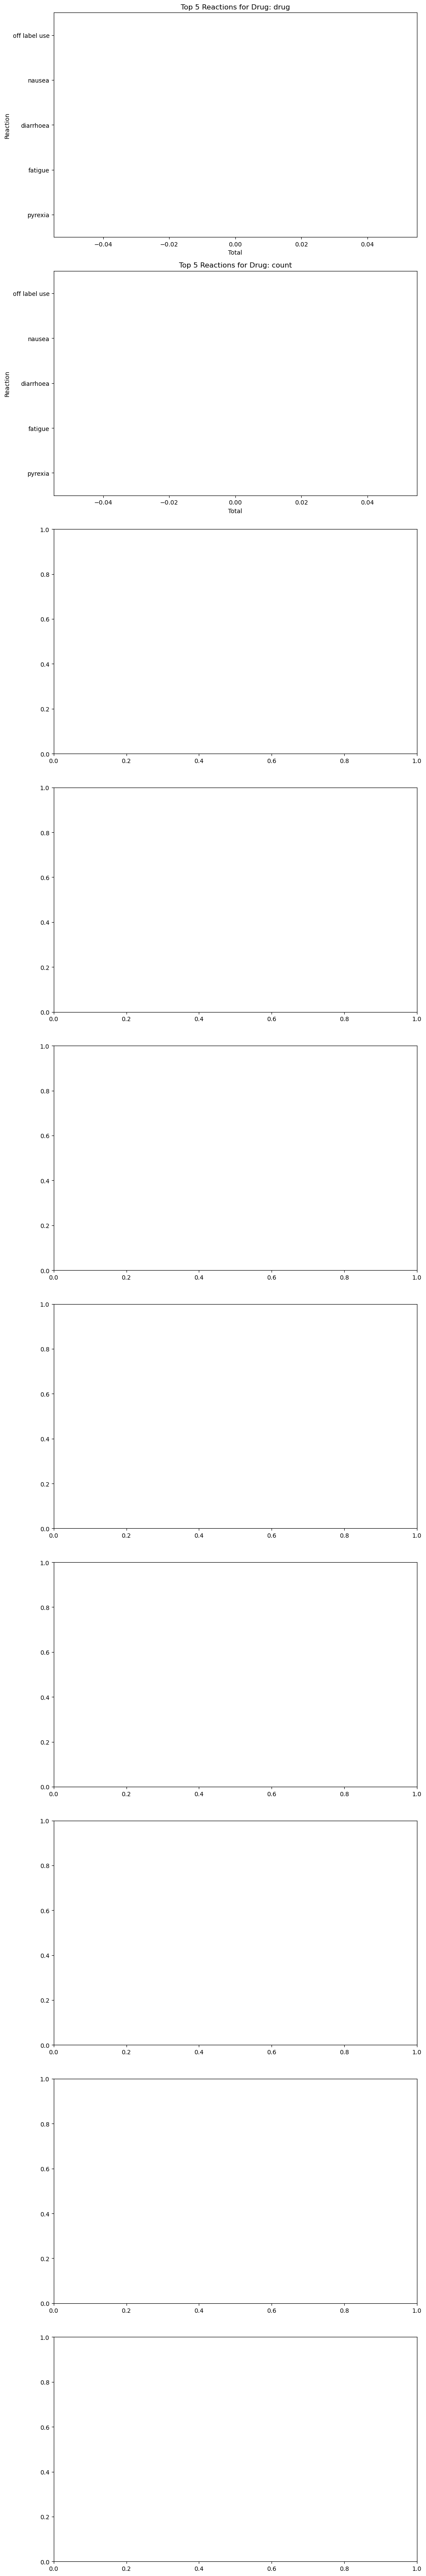

In [43]:
# Step 2: Filter documents_table to include only top 5 drugs
filtered_table = documents_table[documents_table['drug'].isin(top_drugs)]

# Step 3: Calculate top 5 reactions for each top drug
top_reactions_per_drug = {}
for drug in top_drugs:
    drug_data = filtered_table[filtered_table['drug'] == drug]
    reaction_counts = documents_table.drop(columns=['id', 'doc_id', 'doc_type', 'year', 'drug']).sum()
    top_reactions = reaction_counts.nlargest(5).index.tolist()
    top_reactions_per_drug[drug] = top_reactions

# Step 4: Create subplots for each drug
num_drugs = len(top_drugs)
fig, axes = plt.subplots(num_drugs, 1, figsize=(10, 6*num_drugs))

for i, drug in enumerate(top_drugs):
    ax = axes[i]
    drug_data = filtered_table[filtered_table['drug'] == drug]
    reaction_counts = drug_data.drop(columns=['id', 'doc_id', 'doc_type', 'year', 'drug']).sum()
    top_reactions = reaction_counts.nlargest(5)
    
    # Plotting
    sns.barplot(x=top_reactions.values, y=top_reactions.index, ax=ax, palette='magma')
    ax.set_title(f'Top 5 Reactions for Drug: {drug}')
    ax.set_xlabel('Total')
    ax.set_ylabel('Reaction')

plt.tight_layout()
plt.show()

# Reactions Table

In [45]:
reactions = pd.read_csv('C://Users/halee/Downloads/reactions_table2024.csv')
reactions.head()

,patient_reaction_id,event_id,version_medDRA,outcome,off label use,nausea,diarrhoea,fatigue,pyrexia,vomiting,...,fulminant type 1 diabetes mellitus,benign prostatic hyperplasia,inability to afford medication,erythema of eyelid,nerve injury,visual acuity reduced,tooth fracture,blood albumin decreased,bronchiolitis,blood magnesium decreased
0,1,1,26.1,Unknown,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,26.1,Unknown,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,1,26.1,Unknown,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,26.1,Unknown,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,1,26.1,Unknown,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### Graph
* Graph displays proportions post-cleaning and filtering for quality data. Original proportions can be found in DataProcessing within the patient_reactions_table module.

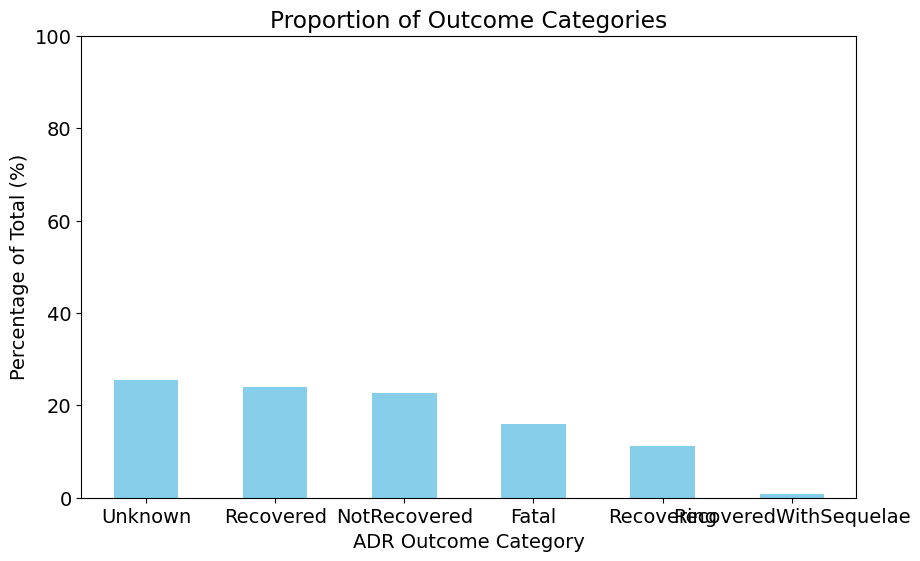

In [46]:
# Count the frequency of each category
category_counts = reactions['outcome'].value_counts()

# Calculate the percentages
total = len(reactions)
percentages = (category_counts / total) * 100

# Text size
plt.rcParams.update({'font.size': 14})

# Plotting the frequency bar plot
plt.figure(figsize=(10, 6))
bars = percentages.plot(kind='bar', color='skyblue')
plt.title('Proportion of Outcome Categories')
plt.xlabel('ADR Outcome Category')
plt.ylabel('Percentage of Total (%)')
plt.ylim(0, 100)
plt.xticks(rotation=0)

plt.show()

#### Descriptives

In [47]:
print(f"Frequency:", reactions['outcome'].value_counts()), print(f"Proportion:", reactions['outcome'].value_counts(normalize = True))

Frequency: outcome
Unknown                  30228
Recovered                28497
NotRecovered             26802
Fatal                    18830
Recovering               13165
RecoveredWithSequelae      988
Name: count, dtype: int64
Proportion: outcome
Unknown                  0.255067
Recovered                0.240461
NotRecovered             0.226158
Fatal                    0.158890
Recovering               0.111088
RecoveredWithSequelae    0.008337
Name: proportion, dtype: float64


(None, None)

### MeDRA Term Versions - All Up to Date with Latest Version

#### Graph

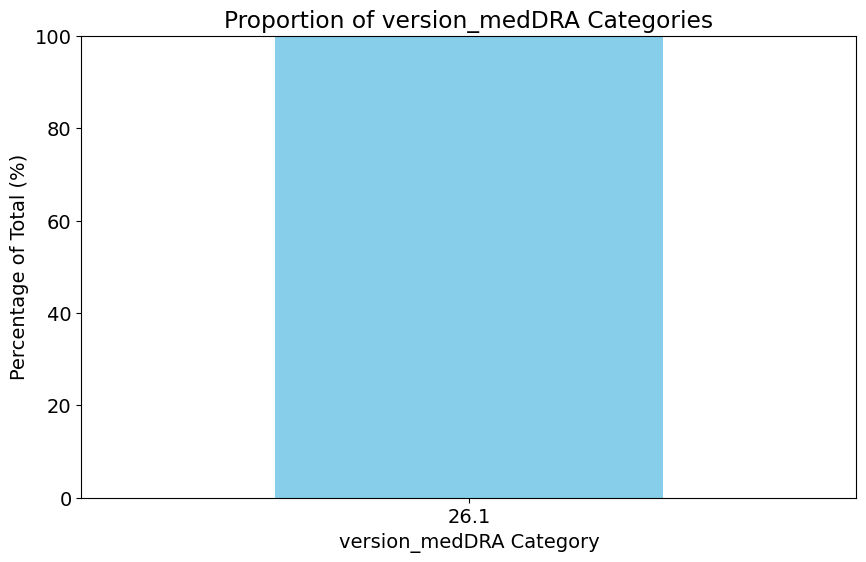

In [48]:
# Count the frequency of each category
category_counts = reactions['version_medDRA'].value_counts()

# Calculate the percentages
total = len(reactions)
percentages = (category_counts / total) * 100

# Text size
plt.rcParams.update({'font.size': 14})

# Plotting the frequency bar plot
plt.figure(figsize=(10, 6))
bars = percentages.plot(kind='bar', color='skyblue')
plt.title('Proportion of version_medDRA Categories')
plt.xlabel('version_medDRA Category')
plt.ylabel('Percentage of Total (%)')
plt.ylim(0, 100)
plt.xticks(rotation=0)

plt.show()

#### Descriptives

In [49]:
print(f"Frequency:", reactions['version_medDRA'].value_counts()), 
print(f"Proportion:", reactions['version_medDRA'].value_counts(normalize = True))

Frequency: version_medDRA
26.1    118510
Name: count, dtype: int64
Proportion: version_medDRA
26.1    1.0
Name: proportion, dtype: float64


### Processed Reaction Terms

In [53]:
reaction_tokens = pd.read_csv('C://Users/halee/Downloads/reaction_tokens.csv')
reaction_tokens.head()

,Unnamed: 0,patient_reaction_id,event_id,reaction_processed,outcome
0,0,1,1,"['blood', 'pressure', 'decreased']",Unknown
1,1,2,1,['disorientation'],Unknown
2,2,3,1,"['speech', 'disorder']",Unknown
3,3,4,1,['flushing'],Unknown
4,4,5,1,['nausea'],Unknown


In [58]:
# descriptive text stat function
descriptive_stats(reaction_tokens['reaction_processed'], top_n=5, verbose=True)

There are 118510 tokens in the data.
There are 5555 unique tokens in the data.
There are 2724415 characters in the data.
The lexical diversity is 0.047 in the data.
The average token length is 22.989 in the data.
The variance of token lengths is 129.349 in the data.
The standard deviation of token lengths is 11.373 in the data.
The 5 most common tokens are [("['label', 'use']", 1964), ("['nausea']", 1439), ("['diarrhoea']", 1316), ("['fatigue']", 1206), ("['pyrexia']", 1173)] in the data.


[118510,
 5555,
 0.04687368154586111,
 2724415,
 22.98890388996709,
 129.34878414155185,
 11.373160692681338,
 [("['label', 'use']", 1964),
  ("['nausea']", 1439),
  ("['diarrhoea']", 1316),
  ("['fatigue']", 1206),
  ("['pyrexia']", 1173)]]

# Events Table

In [31]:
events.dtypes

event_id                        int64
safetyreportid                 object
event_date                     object
serious                         int64
expedited                       int64
report_source                   int64
safetyreportversion           float64
country                        object
age                           float64
sex                             int64
company_name                  float64
event_graph            datetime64[ns]
dtype: object

In [59]:
# Update to query 
events = pd.read_csv('C://Users/halee/Downloads/events_table2024.csv')
events.head()

,event_id,year,expedited,report_source,country,age,sex,weight,serious_outcome,company_name
0,1,2024,1,1,ca,39.0,2,112.00,1,['roche']
1,2,2024,1,1,ca,57.0,1,74.00,1,['roche']
2,3,2024,2,1,us,44.0,2,61.22,1,['shire']
3,4,2024,1,3,ca,65.0,2,57.00,1,['roche']
4,5,2024,1,3,ca,42.0,2,50.00,1,['roche']


In [78]:
events.shape

(4305, 9)

### Three-Level Outcome Based on Seriousness

#### Graph

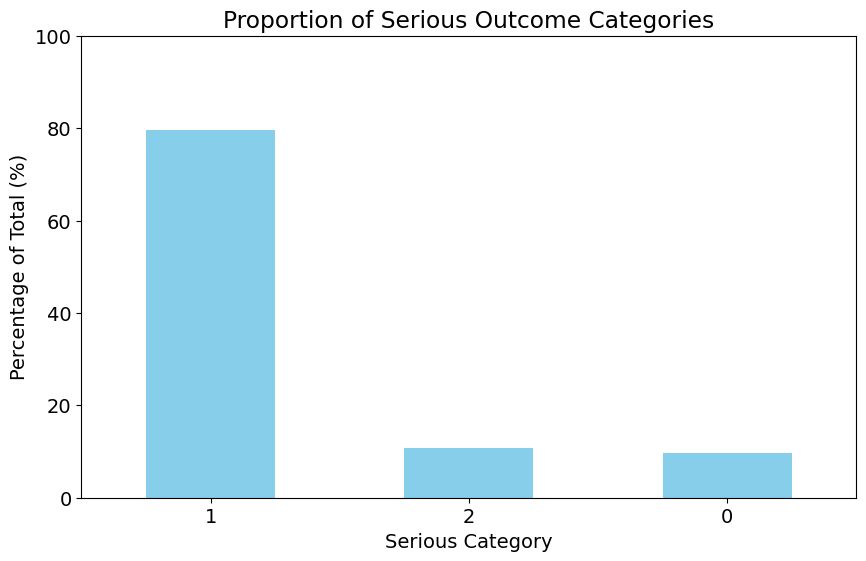

In [60]:
# Count the frequency of each category
category_counts = events['serious_outcome'].value_counts()

# Calculate the percentages
total = len(events)
percentages = (category_counts / total) * 100

# Text size
plt.rcParams.update({'font.size': 14})

# Plotting the frequency bar plot
plt.figure(figsize=(10, 6))
bars = percentages.plot(kind='bar', color='skyblue')
plt.title('Proportion of Serious Outcome Categories')
plt.xlabel('Serious Category')
plt.ylabel('Percentage of Total (%)')
plt.ylim(0, 100)
plt.xticks(rotation=0)

plt.show()

#### Descriptives

In [19]:
print(f"Frequency:", events['serious_outcome'].value_counts()), 
print(f"Proportion:", events['serious_outcome'].value_counts(normalize = True))

Frequency: serious_outcome
NonSerious    2805
Serious       1287
Death          213
Name: count, dtype: int64
Proportion: serious_outcome
NonSerious    0.651568
Serious       0.298955
Death         0.049477
Name: proportion, dtype: float64


### Age

#### Graph

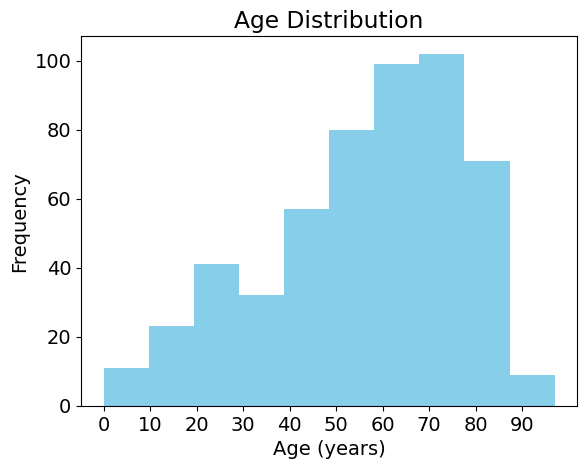

In [17]:
# Text size
plt.rcParams.update({'font.size': 14})

# Distribution of Age
plt.hist(events['age'].astype('float'), color = 'skyblue')
ticks = np.arange(0, 100, 10)  # Customize this range as needed
plt.xticks(ticks)
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

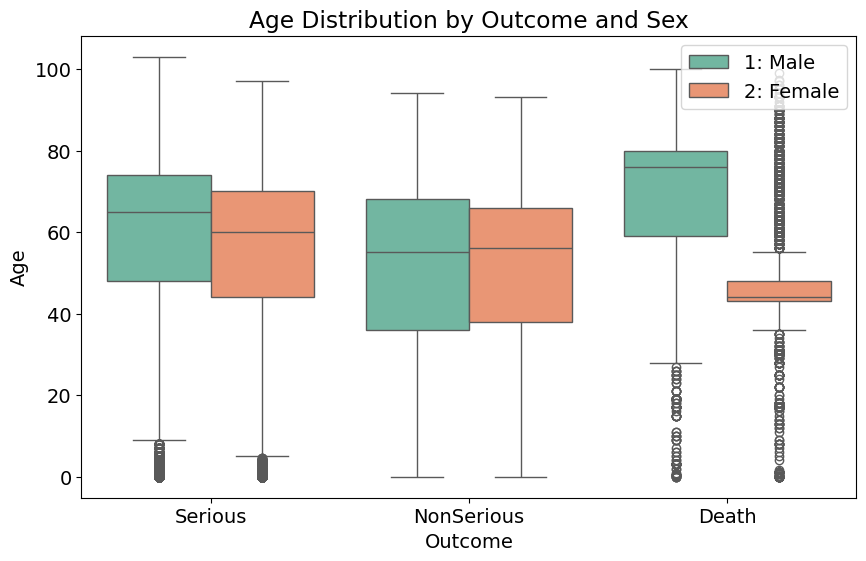

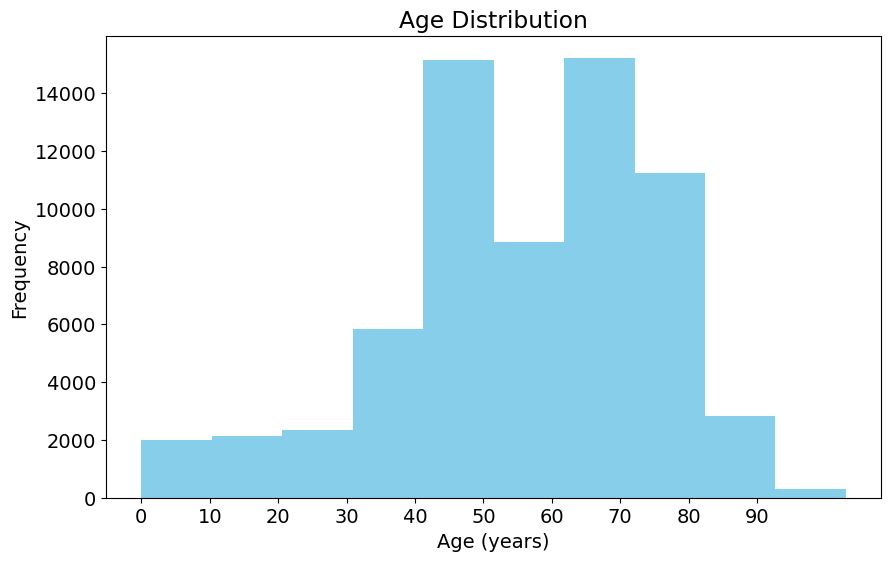

In [70]:
# Update text size
plt.rcParams.update({'font.size': 14})

# Boxplot with grouping variable "Outcome"
plt.figure(figsize=(10, 6))
sns.boxplot(x='serious_outcome', y='age', hue='sex', data=primary_data2024, palette='Set2')

# Customize the plot
plt.xlabel('Outcome')
plt.ylabel('Age')
plt.title('Age Distribution by Outcome and Sex')

# Customize legend labels
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['1: Male', '2: Female']
plt.legend(handles, labels, loc='upper right')

# Show the plot
plt.show()

# Distribution of Age
plt.figure(figsize=(10, 6))
plt.hist(primary_data2024['age'].astype('float'), color='skyblue')
ticks = np.arange(0, 100, 10)  # Customize this range as needed
plt.xticks(ticks)
plt.xlabel('Age (years)')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

#### Descriptives

In [18]:
events_age_descriptives = calculate_descriptives(events['age'])
print(events_age_descriptives)

+------------------------+----------+
| Statistic              |    Value |
+========================+==========+
| Median (Md)            |  60      |
+------------------------+----------+
| Mean (x-bar)           |  56.1878 |
+------------------------+----------+
| Standard Deviation (s) |  20.7576 |
+------------------------+----------+
| Variance (s2)          | 430.879  |
+------------------------+----------+
| Skewness               | nan      |
+------------------------+----------+
| First Quartile (Q1)    |  45      |
+------------------------+----------+
| Third Quartile (Q3)    |  71      |
+------------------------+----------+
None


### Report Dates

#### Descriptives

In [35]:
events['event_date'] = pd.to_datetime(events['event_date'])

events_year = pd.DataFrame()
events_year['year'] = events['event_date'].dt.year

event_year_descriptives = calculate_descriptives(events_year['year'])

+------------------------+-------------+
| Statistic              |       Value |
+========================+=============+
| Median (Md)            | 2014        |
+------------------------+-------------+
| Mean (x-bar)           | 2014.33     |
+------------------------+-------------+
| Standard Deviation (s) |    0.777021 |
+------------------------+-------------+
| Variance (s2)          |    0.603762 |
+------------------------+-------------+
| Skewness               |    3.74427  |
+------------------------+-------------+
| First Quartile (Q1)    | 2014        |
+------------------------+-------------+
| Third Quartile (Q3)    | 2015        |
+------------------------+-------------+


#### Graph

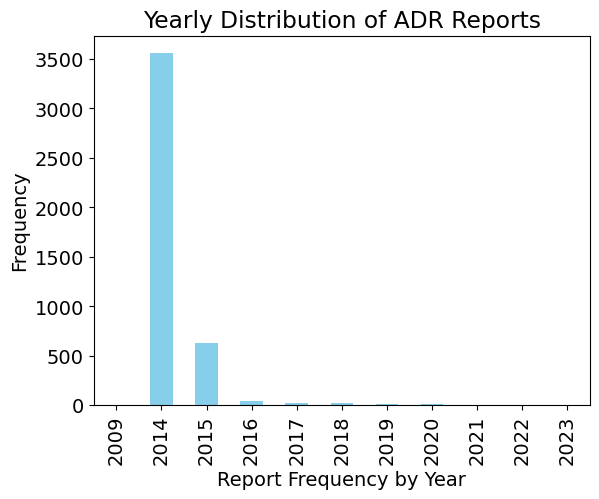

In [51]:
# Text size
plt.rcParams.update({'font.size': 14})

# Distribution of Reports
events['year'].value_counts().sort_index().plot(kind="bar", color="skyblue")

plt.xlabel('Report Frequency by Year')
plt.ylabel('Frequency')
plt.title('Yearly Distribution of ADR Reports')
plt.show()


### Expedited Criteria Status

#### Graph

In [78]:
primary_data2024['expedited'].value_counts()

expedited
1    63160
2     2812
Name: count, dtype: int64

In [77]:
primary_data2024['expedited'] = primary_data2024['expedited'].replace({5:2})

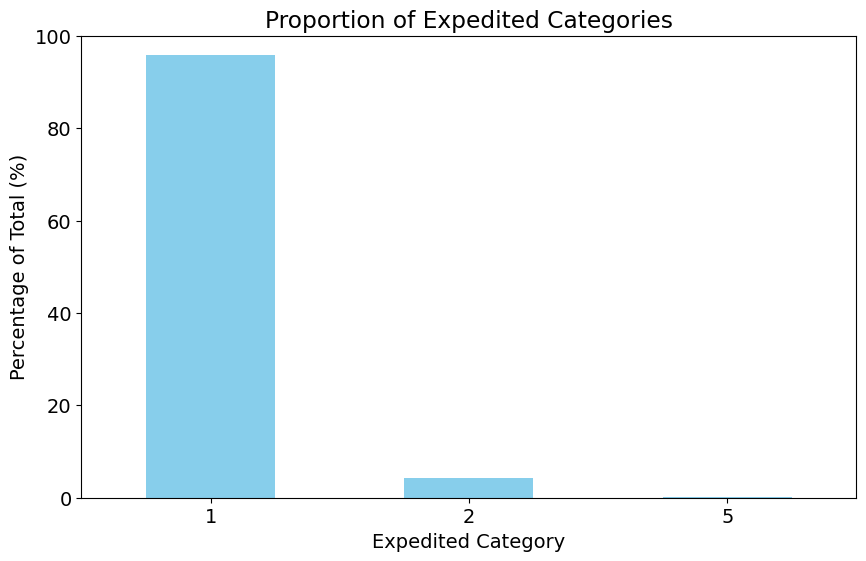

In [73]:
# Count the frequency of each category
category_counts = primary_data2024['expedited'].value_counts()

# Calculate the percentages
total = len(primary_data2024)
percentages = (category_counts / total) * 100

# Text size
plt.rcParams.update({'font.size': 14})

# Plotting the frequency bar plot
plt.figure(figsize=(10, 6))
bars = percentages.plot(kind='bar', color='skyblue')
plt.title('Proportion of Expedited Categories')
plt.xlabel('Expedited Category')
plt.ylabel('Percentage of Total (%)')
plt.ylim(0, 100)
plt.xticks(rotation=0)

plt.show()

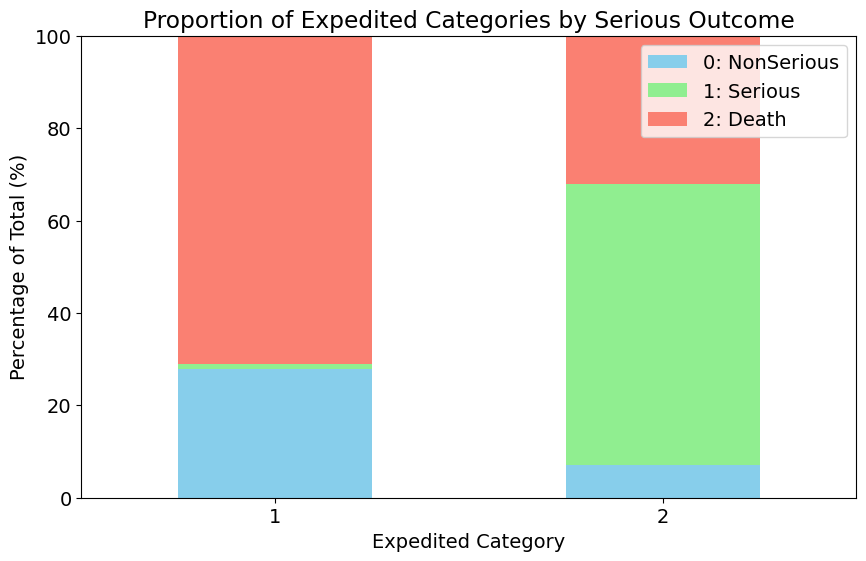

In [79]:
# Count the frequency of each combination of 'expedited' and 'serious_outcome'
grouped_data = primary_data2024.groupby(['expedited', 'serious_outcome']).size().unstack(fill_value=0)

# Calculate the percentages
grouped_percentages = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Plotting the grouped stacked bar plot
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(10, 6))

# Stacked bar plot
grouped_percentages.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'lightgreen', 'salmon'])

# Customize the plot
plt.title('Proportion of Expedited Categories by Serious Outcome')
plt.xlabel('Expedited Category')
plt.ylabel('Percentage of Total (%)')
plt.ylim(0, 100)
plt.xticks(rotation=0)

# Custom legend labels
handles, labels = ax.get_legend_handles_labels()
labels = ['0: NonSerious', '1: Serious', '2: Death']
plt.legend(handles, labels, loc='upper right')

plt.show()

#### Descriptives

In [81]:
print(f"Frequency:", primary_data2024['expedited'].value_counts()), 
print(f"Proportion:", primary_data2024['expedited'].value_counts(normalize = True))

Frequency: expedited
1    63160
2     2812
Name: count, dtype: int64
Proportion: expedited
1    0.957376
2    0.042624
Name: proportion, dtype: float64


### Report Source

#### Graph

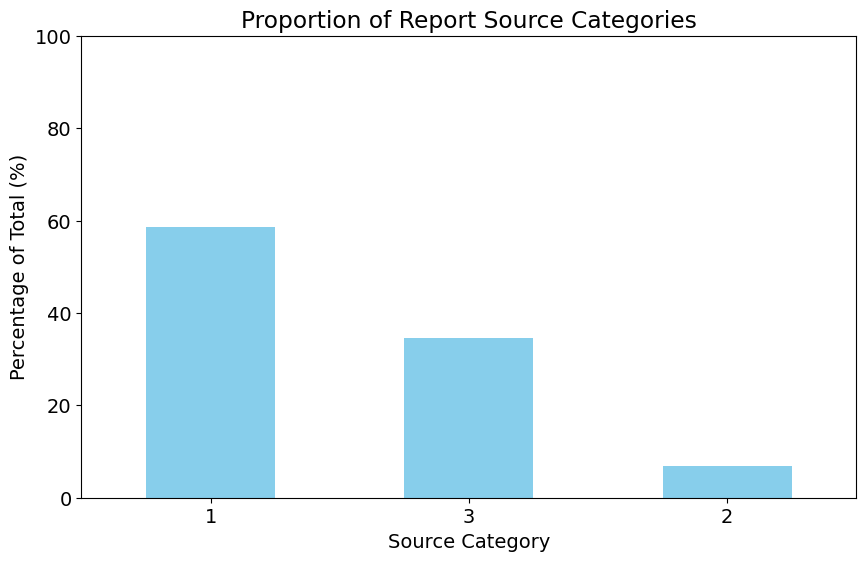

In [22]:
# Count the frequency of each category
category_counts = events['report_source'].value_counts()

# Calculate the percentages
total = len(events)
percentages = (category_counts / total) * 100

# Text size
plt.rcParams.update({'font.size': 14})

# Plotting the frequency bar plot
plt.figure(figsize=(10, 6))
bars = percentages.plot(kind='bar', color='skyblue')
plt.title('Proportion of Report Source Categories')
plt.xlabel('Source Category')
plt.ylabel('Percentage of Total (%)')
plt.ylim(0, 100)
plt.xticks(rotation=0)

plt.show()

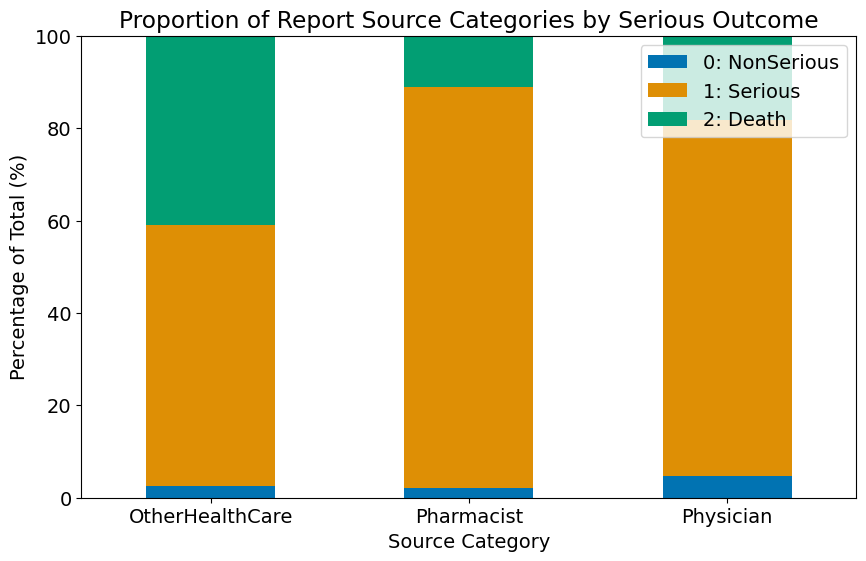

In [9]:
primary_data2024['report_source'] = primary_data2024['report_source'].replace({1:'Physician',2:'Pharmacist',3:'OtherHealthCare'})

# Count the frequency of each combination of 'report_source' and 'serious'
grouped_data = primary_data2024.groupby(['report_source', 'serious_outcome']).size().unstack(fill_value=0)

# Calculate the percentages
grouped_percentages = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Update text size
plt.rcParams.update({'font.size': 14})

# Plotting the grouped stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Stacked bar plot
# Stacked bar plot with colorblind-friendly palette
colorblind_palette = sns.color_palette("colorblind")
grouped_percentages.plot(kind='bar', stacked=True, ax=ax, color=colorblind_palette)

# Customize the plot
plt.title('Proportion of Report Source Categories by Serious Outcome')
plt.xlabel('Source Category')
plt.ylabel('Percentage of Total (%)')
plt.ylim(0, 100)
plt.xticks(rotation=0)

# Custom legend labels
handles, labels = ax.get_legend_handles_labels()
labels = ['0: NonSerious', '1: Serious', '2: Death']
plt.legend(handles, labels, loc='upper right')

plt.show()

#### Descriptives

In [85]:
print(f"Frequency:", primary_data2024['report_source'].value_counts()), 
print(f"Proportion:", primary_data2024['report_source'].value_counts(normalize = True))

Frequency: report_source
Physician          32124
OtherHealthCare    27452
Pharmacist          6396
Name: count, dtype: int64
Proportion: report_source
Physician          0.486934
OtherHealthCare    0.416116
Pharmacist         0.096950
Name: proportion, dtype: float64


### Company

#### Descriptives

In [86]:
print(f"Frequency:", primary_data2024['company_name'].value_counts()), 
print(f"Proportion:", primary_data2024['company_name'].value_counts(normalize = True))

Frequency: company_name
['nan']                                                                                       17373
['nvsc']                                                                                       5055
['roche']                                                                                      3957
['pfizer', 'inc']                                                                              2171
['jnjfoc']                                                                                     2050
['afssaps']                                                                                    1890
['sac']                                                                                        1695
['takeda']                                                                                     1641
['abbvie']                                                                                     1503
['aurobindo', 'apl']                                                        

### Country 

#### Descriptives

In [87]:
print(f"Frequency:", primary_data2024['country'].value_counts()), 
print(f"Proportion:", primary_data2024['country'].value_counts(normalize = True))

Frequency: country
ca    22034
fr    14965
us     5008
de     4245
jp     3565
cn     3115
gb     3012
it     2376
es     1077
at     1029
pl      628
nl      520
co      472
kr      461
pt      383
ch      371
be      294
au      256
gr      177
se      171
ru      165
br      137
dk      137
cz      131
bg      131
ro       81
il       78
tw       78
ie       76
tr       60
hu       53
hr       43
nz       40
ar       35
in       32
sk       31
fi       29
cy       29
eg       29
mx       28
za       26
ir       25
ae       25
sg       21
sa       20
by       19
si       17
no       16
vn       15
cl       15
uz       12
mm       12
lu       12
th       12
eu       10
uy       10
rs       10
lt        9
hk        9
pr        9
ht        5
ke        5
ph        5
af        5
kw        5
ee        4
dz        4
om        4
ua        4
kz        4
my        3
kp        3
ma        3
cu        2
ba        2
ec        2
sy        2
do        2
ky        2
cd        2
mt        2
az       

### Sex

#### Graph

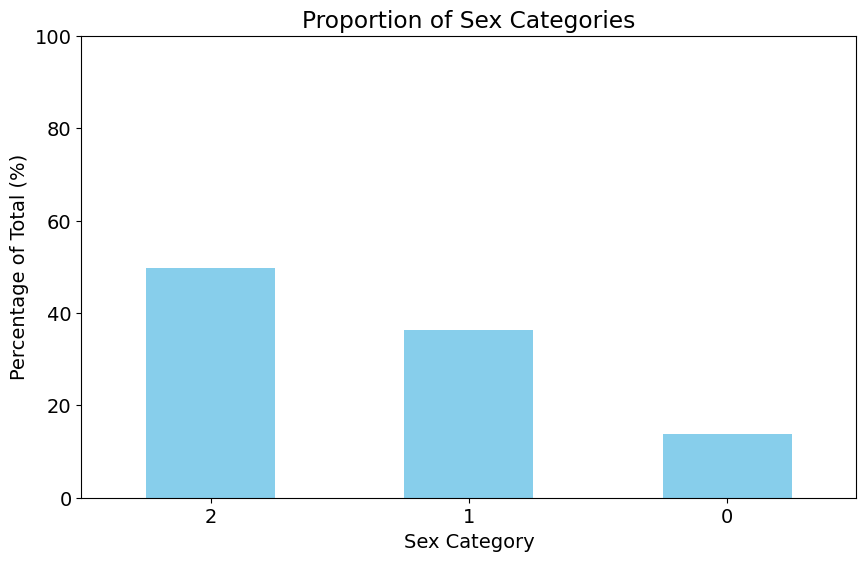

In [26]:
# Count the frequency of each category
category_counts = primary_data2024['sex'].value_counts()

# Calculate the percentages
total = len(primary_data2024)
percentages = (category_counts / total) * 100

# Text size
plt.rcParams.update({'font.size': 14})

# Plotting the frequency bar plot
plt.figure(figsize=(10, 6))
bars = percentages.plot(kind='bar', color='skyblue')
plt.title('Proportion of Sex Categories')
plt.xlabel('Sex Category')
plt.ylabel('Percentage of Total (%)')
plt.ylim(0, 100)
plt.xticks(rotation=0)

plt.show()

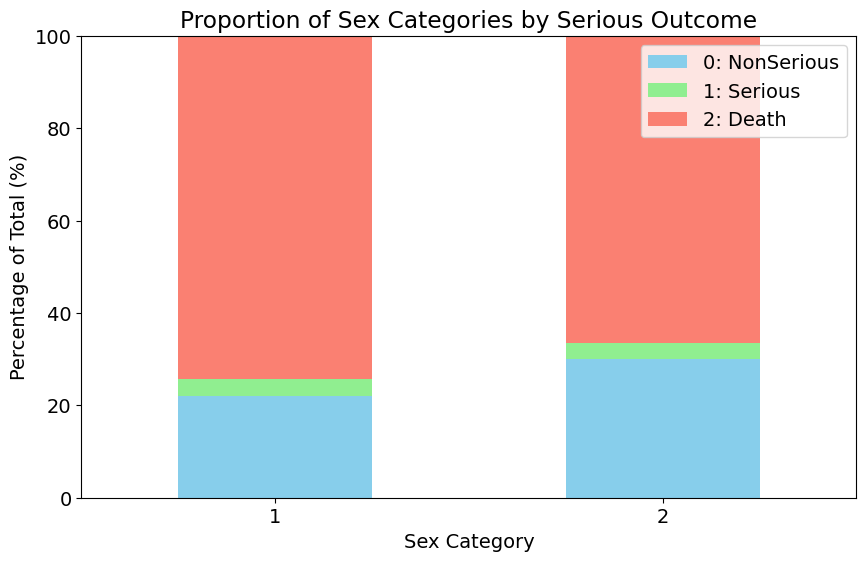

In [88]:
# Count the frequency of each combination of 'sex' and 'serious_outcome'
grouped_data = primary_data2024.groupby(['sex', 'serious_outcome']).size().unstack(fill_value=0)

# Calculate the percentages
grouped_percentages = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Update text size
plt.rcParams.update({'font.size': 14})

# Plotting the grouped stacked bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Stacked bar plot
grouped_percentages.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'lightgreen', 'salmon'])

# Customize the plot
plt.title('Proportion of Sex Categories by Serious Outcome')
plt.xlabel('Sex Category')
plt.ylabel('Percentage of Total (%)')
plt.ylim(0, 100)
plt.xticks(rotation=0)

# Custom legend labels
handles, labels = ax.get_legend_handles_labels()
labels = ['0: NonSerious', '1: Serious', '2: Death']
plt.legend(handles, labels, loc='upper right')

plt.show()

#### Descriptives

In [89]:
print(f"Frequency:", primary_data2024['sex'].value_counts()), 
print(f"Proportion:", primary_data2024['sex'].value_counts(normalize = True))

Frequency: sex
2    41612
1    24360
Name: count, dtype: int64
Proportion: sex
2    0.630752
1    0.369248
Name: proportion, dtype: float64


# Labels Table

In [90]:
# Update to query 
labels = pd.read_csv('C://Users/halee/Downloads/labels_table2024.csv')
labels.head()

,set_id,label_id,year,ndc9,rxcui,unii,ingredients,warnings,drug_names,purpose
0,00006ebc-ec2b-406c-96b7-a3cc422e933f,1,2023,NaN,NaN,NaN,"mezereum, daphne, bark, sucrose, lactose, white",NaN,NaN,"us, itching, relieve, symptom"
1,00011703-bc55-4c0c-858c-149dc674bc3c,2,2023,NaN,NaN,NaN,"ofloxacin, sodium, chloride, hydrochloric, aci...","directly, metabolism, staining, systemically, ...",NaN,NaN
2,000155a8-709c-44e5-a75f-cd890f3a7caf,3,2023,['50090-0481'],198014,57Y76R9ATQ,"naproxen, croscarmellose, sodium, povidone, un...",NaN,naproxen,NaN
3,0001d1cf-f727-4875-a44f-5a51f7b617a4,4,2023,['79903-165'],1046593,F5UM2KM3W7,"moisturizing, antibacterial, benzalkonium, chl...",NaN,"benzalkonium, chloride","purpose, antibacterial"
4,0002a6ef-6e5e-4a34-95d5-ebaab222496f,5,2024,['48951-3142'],NaN,"S7V92P67HO, 39M11XPH03, 1G4GK01F67, X7BCI5P86H...","cuprum, aceticum, nicotiana, sucrose, cupric, ...",NaN,"cuprum, aceticum, nicotiana","relief, cough, temporary, use"


### Number of Unique NDC, Rxcui, and UNII codes

In [92]:
print(f"Unique NDC:", len(set(labels['ndc9']))),
print(f"Unique Rxcui:", len(set(labels['rxcui']))),
print(f"Unique Unii:", len(set(labels['unii'])))

Unique NDC: 46884
Unique Rxcui: 7782
Unique Unii: 4788


### Label Dates

#### Graph

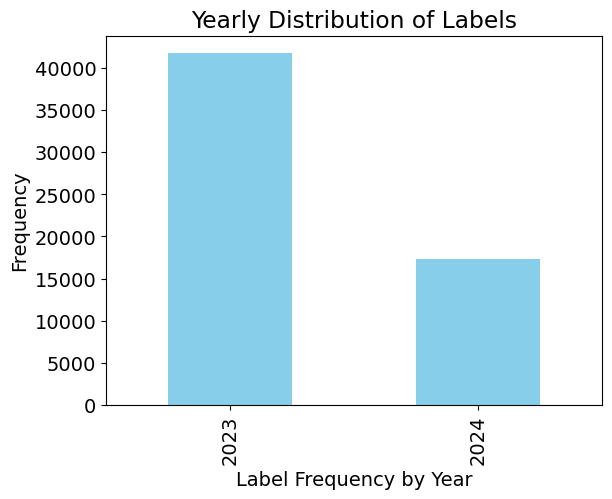

In [93]:
# Text size
plt.rcParams.update({'font.size': 14})

# Distribution of Reports
labels['year'].value_counts().sort_index().plot(kind="bar", color="skyblue")

plt.xlabel('Label Frequency by Year')
plt.ylabel('Frequency')
plt.title('Yearly Distribution of Labels')
plt.show()


#### Descriptives

In [94]:
labels_year_descriptives = calculate_descriptives(labels['year'])
labels_year_descriptives

+------------------------+-------------+
| Statistic              |       Value |
+========================+=============+
| Median (Md)            | 2023        |
+------------------------+-------------+
| Mean (x-bar)           | 2023.29     |
+------------------------+-------------+
| Standard Deviation (s) |    0.455356 |
+------------------------+-------------+
| Variance (s2)          |    0.207349 |
+------------------------+-------------+
| Skewness               |    0.907122 |
+------------------------+-------------+
| First Quartile (Q1)    | 2023        |
+------------------------+-------------+
| Third Quartile (Q3)    | 2024        |
+------------------------+-------------+


### Ingredient List
* There are 9481 unique ingredients

In [95]:
# descriptive text stat function
descriptive_stats(labels['ingredients'], top_n=10, verbose=True)

There are 59052 tokens in the data.
There are 46125 unique tokens in the data.
There are 14051817 characters in the data.
The lexical diversity is 0.781 in the data.
The average token length is 237.957 in the data.
The variance of token lengths is 33455.554 in the data.
The standard deviation of token lengths is 182.909 in the data.
The 10 most common tokens are [('oxygen', 472), ('nitrogen', 129), ('honey, lemon, cough, drop, menthol, water, b', 53), ('isopropyl, alcohol, water', 50), ('hydrogen, peroxide, water', 49), ('cherry, cough, drop, menthol, water, b', 43), ('nitrous, oxide', 42), ('cream, titanium, dioxide, zinc, oxide, polymethylsilsesquioxane, 11, micron, hexyl, laurate, isododecane, mica, polyglyceryl, 4, isostearate, peg, 10, dimethicone, 600, cst, stearic, acid, vinyl, crosspolymer, soft, particle, cyclomethicone, 5', 35), ('docosanol, benzyl, alcohol, light, mineral, oil, propylene, glycol, water, sucrose, distearate, stearate', 30), ('alcohol, prep, pad, isopropyl, wa

[59052,
 46125,
 0.7810912416175574,
 14051817,
 237.95666531192848,
 33455.55368330511,
 182.90859379292465,
 [('oxygen', 472),
  ('nitrogen', 129),
  ('honey, lemon, cough, drop, menthol, water, b', 53),
  ('isopropyl, alcohol, water', 50),
  ('hydrogen, peroxide, water', 49),
  ('cherry, cough, drop, menthol, water, b', 43),
  ('nitrous, oxide', 42),
  ('cream, titanium, dioxide, zinc, oxide, polymethylsilsesquioxane, 11, micron, hexyl, laurate, isododecane, mica, polyglyceryl, 4, isostearate, peg, 10, dimethicone, 600, cst, stearic, acid, vinyl, crosspolymer, soft, particle, cyclomethicone, 5',
   35),
  ('docosanol, benzyl, alcohol, light, mineral, oil, propylene, glycol, water, sucrose, distearate, stearate',
   30),
  ('alcohol, prep, pad, isopropyl, water', 30)]]

### Warnings
* There are over 1500 unique warnings tokens

In [96]:
# descriptive text stat function
descriptive_stats(labels['warnings'], top_n=1, verbose=True)

There are 8811 tokens in the data.
There are 4159 unique tokens in the data.
There are 42883465 characters in the data.
The lexical diversity is 0.472 in the data.
The average token length is 4867.037 in the data.
The variance of token lengths is 5727550.542 in the data.
The standard deviation of token lengths is 2393.230 in the data.
The 1 most common tokens are [('activity, except, alcohol, fetus, precaution, state, approximately, food, infant, depressant, posture, weight, starting, benefit, justifies, hemorrhagic, contraindication, fetal, regarding, neonate, clearly, possibility, receive, milk, patient, therefore, abrupt, rat, decreased, population, mouse, omphalocele, woman, 7, consequent, increased, incomplete, dangerous, sustain, system, clinical, disappeared, multiple, forelimb, spontaneously, found, caused, pregnant, increase, poor, withdrawal, mean, obtain, hazardous, discontinue, e, parent, one, drug, function, safety, additive, gradually, kidney, throughout, reduce, cyst, ca

[8811,
 4159,
 0.47202360685506756,
 42883465,
 4867.0372261945295,
 5727550.541798865,
 2393.2301481050386,
 [('activity, except, alcohol, fetus, precaution, state, approximately, food, infant, depressant, posture, weight, starting, benefit, justifies, hemorrhagic, contraindication, fetal, regarding, neonate, clearly, possibility, receive, milk, patient, therefore, abrupt, rat, decreased, population, mouse, omphalocele, woman, 7, consequent, increased, incomplete, dangerous, sustain, system, clinical, disappeared, multiple, forelimb, spontaneously, found, caused, pregnant, increase, poor, withdrawal, mean, obtain, hazardous, discontinue, e, parent, one, drug, function, safety, additive, gradually, kidney, throughout, reduce, cyst, cautioned, hallucination, enlarged, seen, skeletal, rabbit, may, pregnancy, taking, reported, day, caregiver, hernia, chronically, established, whether, warning, given, shown, c, caution, treated, 13, neonatal, symptom, slow, deterioration, le, general, sign

### Drug Names

In [97]:
# descriptive text stat function
descriptive_stats(labels['drug_names'], top_n=5, verbose=True)

There are 47277 tokens in the data.
There are 7697 unique tokens in the data.
There are 1280162 characters in the data.
The lexical diversity is 0.163 in the data.
The average token length is 27.078 in the data.
The variance of token lengths is 1553.830 in the data.
The standard deviation of token lengths is 39.419 in the data.
The 5 most common tokens are [('alcohol', 868), ('zinc, oxide', 845), ('menthol', 627), ('benzalkonium, chloride', 585), ('acetaminophen', 554)] in the data.


[47277,
 7697,
 0.16280643864881444,
 1280162,
 27.07790257419041,
 1553.8303209767803,
 39.41865447953266,
 [('alcohol', 868),
  ('zinc, oxide', 845),
  ('menthol', 627),
  ('benzalkonium, chloride', 585),
  ('acetaminophen', 554)]]

### Purpose

In [98]:
# descriptive text stat function
descriptive_stats(labels['purpose'], top_n=5, verbose=True)

There are 32210 tokens in the data.
There are 5267 unique tokens in the data.
There are 1470325 characters in the data.
The lexical diversity is 0.164 in the data.
The average token length is 45.648 in the data.
The variance of token lengths is 3437.784 in the data.
The standard deviation of token lengths is 58.633 in the data.
The 5 most common tokens are [('sunscreen, purpose', 4050), ('antiseptic, purpose', 1880), ('fever, reliever, reducer, pain, purpose', 1264), ('purpose, antihistamine', 801), ('protectant, skin, purpose', 680)] in the data.


[32210,
 5267,
 0.16352064576218567,
 1470325,
 45.64809065507606,
 3437.784045562723,
 58.632619296452404,
 [('sunscreen, purpose', 4050),
  ('antiseptic, purpose', 1880),
  ('fever, reliever, reducer, pain, purpose', 1264),
  ('purpose, antihistamine', 801),
  ('protectant, skin, purpose', 680)]]

# Patient Drugs Table
* A subset of about 700 drugs are reported in FAERS

In [99]:
# Update to query 
drugs = pd.read_csv('C://Users/halee/Downloads/drugs_table2024_prep.csv')
drugs.head()

,patient_drug_id,event_id,spl_set_id,ingredients,med_product,generic_name,manufacturers,manu_num,rxcui,unii,ndc9
0,1,1,7f6a2191-adfb-48b9-9bfa-0d9920479f0d,['omalizumab'],['xolair'],['omalizumab'],['genentech'],1,1657209.0,['2P471X1Z11'],502420040.0
1,2,1,7f6a2191-adfb-48b9-9bfa-0d9920479f0d,['omalizumab'],['xolair'],['omalizumab'],['genentech'],1,1657209.0,['2P471X1Z11'],502420040.0
2,3,1,7f6a2191-adfb-48b9-9bfa-0d9920479f0d,['omalizumab'],['xolair'],['omalizumab'],['genentech'],1,1657209.0,['2P471X1Z11'],502420040.0
3,4,1,7f6a2191-adfb-48b9-9bfa-0d9920479f0d,['omalizumab'],['xolair'],['omalizumab'],['genentech'],1,1657209.0,['2P471X1Z11'],502420040.0
4,5,1,7f6a2191-adfb-48b9-9bfa-0d9920479f0d,['omalizumab'],['xolair'],['omalizumab'],['genentech'],1,1657209.0,['2P471X1Z11'],502420040.0


### Unique SPL Set IDs, Rxcui, and UNII codes

In [101]:
print(f"Unique SPL Set IDs:", len(set(drugs['spl_set_id']))),
print(f"Unique Rxcui:", len(set(drugs['rxcui']))),
print(f"Unique UNII:" ,len(set(drugs['unii'])))
print(f"Unique NDC9:" ,len(set(drugs['ndc9'])))

Unique SPL Set IDs: 1740
Unique Rxcui: 24680
Unique UNII: 1356
Unique NDC9: 22954


### Medicinal Product

In [102]:
# descriptive text stat function
descriptive_stats(drugs['med_product'], top_n=5, verbose=True)

There are 146567 tokens in the data.
There are 3473 unique tokens in the data.
There are 2542227 characters in the data.
The lexical diversity is 0.024 in the data.
The average token length is 17.345 in the data.
The variance of token lengths is 74.151 in the data.
The standard deviation of token lengths is 8.611 in the data.
The 5 most common tokens are [("['methotrexate']", 3060), ("['actemra']", 3056), ("['prednisone']", 2461), ("['sulfasalazine']", 2139), ("['rituximab']", 2106)] in the data.


[146567,
 3473,
 0.023695647724248977,
 2542227,
 17.345152728786154,
 74.15108048712307,
 8.611102164480634,
 [("['methotrexate']", 3060),
  ("['actemra']", 3056),
  ("['prednisone']", 2461),
  ("['sulfasalazine']", 2139),
  ("['rituximab']", 2106)]]

### Generic Name

In [103]:
# descriptive text stat function
descriptive_stats(drugs['generic_name'], top_n=5, verbose=True)

There are 125360 tokens in the data.
There are 1460 unique tokens in the data.
There are 2911163 characters in the data.
The lexical diversity is 0.012 in the data.
The average token length is 23.222 in the data.
The variance of token lengths is 1178.420 in the data.
The standard deviation of token lengths is 34.328 in the data.
The 5 most common tokens are [("['methotrexate', 'sodium']", 3712), ("['tocilizumab']", 3489), ("['infliximab']", 2494), ("['prednisone']", 2461), ("['rituximab']", 2322)] in the data.


[125360,
 1460,
 0.011646458200382898,
 2911163,
 23.222423420548818,
 1178.4201114212256,
 34.32812420481529,
 [("['methotrexate', 'sodium']", 3712),
  ("['tocilizumab']", 3489),
  ("['infliximab']", 2494),
  ("['prednisone']", 2461),
  ("['rituximab']", 2322)]]

### Manufacturers

In [104]:
# descriptive text stat function
descriptive_stats(drugs['manufacturers'], top_n=5, verbose=True)

There are 125360 tokens in the data.
There are 1172 unique tokens in the data.
There are 43944475 characters in the data.
The lexical diversity is 0.009 in the data.
The average token length is 350.546 in the data.
The variance of token lengths is 679461.358 in the data.
The standard deviation of token lengths is 824.294 in the data.
The 5 most common tokens are [("['genentech']", 11059), ("['janssen-biotech']", 4375), ("['sanofi-aventis-u-s-']", 3287), ("['chartwell-rx', 'hospira', 'shorla-oncology-', 'teva-women-s-health', 'fresenius-kabi-', 'hikma-pharmaceuticals-', 'sun-pharmaceutical-industries', 'mylan-pharmaceuticals-', 'medexus-pharma-', 'aurobindo-pharma-limited', 'azurity-pharmaceuticals', 'teva-parenteral-medicines', 'zydus-pharmaceuticals-', 'teva-pharmaceuticals-', 'accord-healthcare', 'amneal-pharmaceuticals-ny-', 'zydus-lifesciences-limited', 'accord-healthcare-', 'alembic-pharmaceuticals-', 'antares-pharma', 'alembic-pharmaceuticals-limited']", 3060), ("['takeda-pharmac

[125360,
 1172,
 0.009349074664964901,
 43944475,
 350.5462268666241,
 679461.3576429109,
 824.294460519365,
 [("['genentech']", 11059),
  ("['janssen-biotech']", 4375),
  ("['sanofi-aventis-u-s-']", 3287),
  ("['chartwell-rx', 'hospira', 'shorla-oncology-', 'teva-women-s-health', 'fresenius-kabi-', 'hikma-pharmaceuticals-', 'sun-pharmaceutical-industries', 'mylan-pharmaceuticals-', 'medexus-pharma-', 'aurobindo-pharma-limited', 'azurity-pharmaceuticals', 'teva-parenteral-medicines', 'zydus-pharmaceuticals-', 'teva-pharmaceuticals-', 'accord-healthcare', 'amneal-pharmaceuticals-ny-', 'zydus-lifesciences-limited', 'accord-healthcare-', 'alembic-pharmaceuticals-', 'antares-pharma', 'alembic-pharmaceuticals-limited']",
   3060),
  ("['takeda-pharmaceuticals-america']", 3042)]]

In [105]:
num_manu_descriptives = calculate_descriptives(drugs['manu_num'])


+------------------------+------------+
| Statistic              |      Value |
+========================+============+
| Median (Md)            |    1       |
+------------------------+------------+
| Mean (x-bar)           |   13.1563  |
+------------------------+------------+
| Standard Deviation (s) |   35.1544  |
+------------------------+------------+
| Variance (s2)          | 1235.83    |
+------------------------+------------+
| Skewness               |    5.99418 |
+------------------------+------------+
| First Quartile (Q1)    |    1       |
+------------------------+------------+
| Third Quartile (Q3)    |   13       |
+------------------------+------------+


# Prices Table

In [48]:
# Update to query 
prices = pd.read_csv('DataLibrary/prices_table.csv')
prices.head()

,ndc,unit_price,year,generic_brand
0,24385005452,0.28255,2022,1
1,70000047501,0.28255,2022,1
2,46122038576,0.78326,2022,1
3,70000036201,0.15365,2022,1
4,70000036202,0.15365,2022,1


### Number of Unique Drug Codes (NDC)

In [55]:
print(f"Unique NDC:", len(set(prices['ndc'])))

Unique NDC: 10000


### National Average Cost per Unit

#### Graph

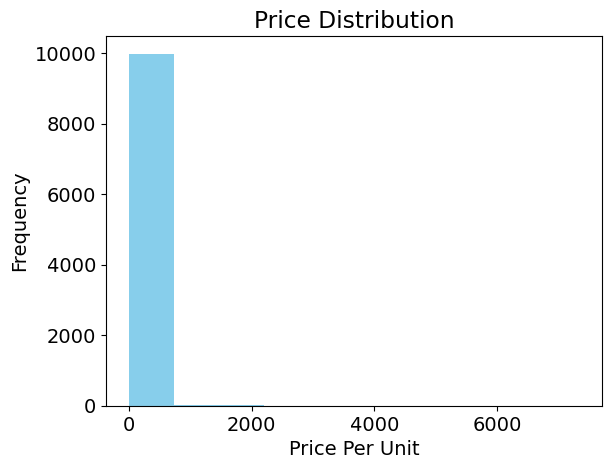

In [49]:
# Text size
plt.rcParams.update({'font.size': 14})

# Distribution of Age
plt.hist(prices['unit_price'].astype('float'), color = 'skyblue')
#ticks = np.arange(0, 100, 10)  # Customize this range as needed
#plt.xticks(ticks)
plt.xlabel('Price Per Unit')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

#### Descriptives

In [50]:
prices_descriptives = calculate_descriptives(prices['unit_price'])

+------------------------+--------------+
| Statistic              |        Value |
+========================+==============+
| Median (Md)            |     0.25819  |
+------------------------+--------------+
| Mean (x-bar)           |     9.31067  |
+------------------------+--------------+
| Standard Deviation (s) |   141.292    |
+------------------------+--------------+
| Variance (s2)          | 19963.5      |
+------------------------+--------------+
| Skewness               |    36.6264   |
+------------------------+--------------+
| First Quartile (Q1)    |     0.09805  |
+------------------------+--------------+
| Third Quartile (Q3)    |     0.783827 |
+------------------------+--------------+


### Effective Price Dates

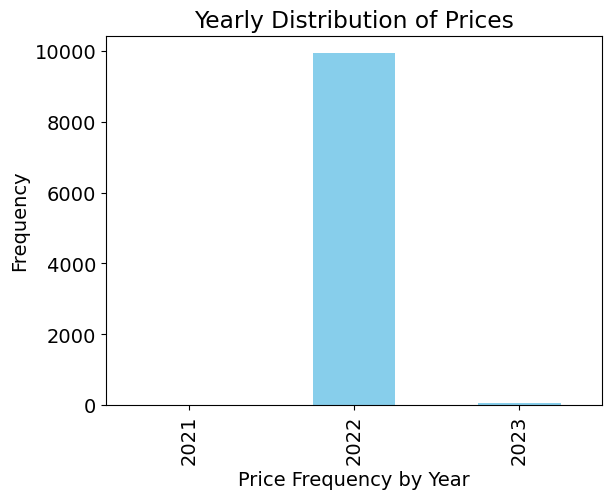

In [53]:
# Text size
plt.rcParams.update({'font.size': 14})

# Distribution of Reports
prices['year'].value_counts().sort_index().plot(kind="bar", color="skyblue")

plt.xlabel('Price Frequency by Year')
plt.ylabel('Frequency')
plt.title('Yearly Distribution of Prices')
plt.show()


### Drug Type

#### Graph

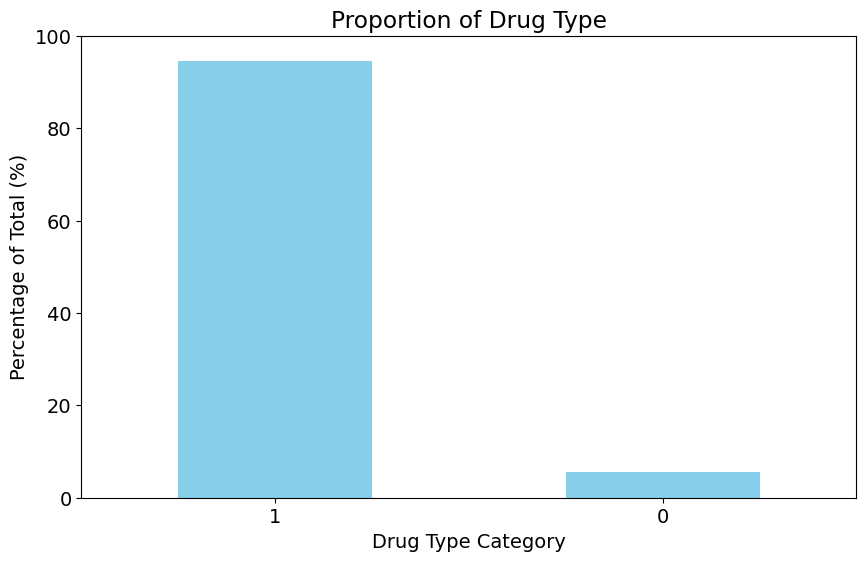

In [54]:
# Count the frequency of each category
category_counts = prices['generic_brand'].value_counts()

# Calculate the percentages
total = len(prices)
percentages = (category_counts / total) * 100

# Text size
plt.rcParams.update({'font.size': 14})

# Plotting the frequency bar plot
plt.figure(figsize=(10, 6))
bars = percentages.plot(kind='bar', color='skyblue')
plt.title('Proportion of Drug Type')
plt.xlabel('Drug Type Category')
plt.ylabel('Percentage of Total (%)')
plt.ylim(0, 100)
plt.xticks(rotation=0)
#nums = [1,0]
#labels = ['Generic', 'Brand']
#plt.legend(nums, labels)
plt.show()

#### Descriptives

In [ ]:
print(f"Frequency:", prices['generic_brand'].value_counts()), 
print(f"Proportion:", prices['generic_brand'].value_counts(normalize = True))

# Manufacturer Table

In [57]:
manus = pd.read_csv('DataLibrary/manus_table.csv')
manus.head()

,manu_id,spl_id,ndc,year,drug_names,drug_names.1,spl_set_id,unii,drug_names.2,drug_names.3,manufacturers
0,1,c1557e29-07ec-4532-b126-7df9afe531cd,11673-086,2014,Ethyl Alcohol Hand Sanitizer,"['alcohol hand', 'sanitizer', 'alcohol', 'hand...",['7dd1ec7c-f2ad-4801-a966-dd7ea0976b8a'],['3K9958V90M'],Ethyl Alcohol Hand Sanitizer,"['alcohol hand', 'sanitizer', 'alcohol', 'hand...",['target-']
1,2,cf587673-375f-46e8-82d2-db1f2c470e1f,11673-597,2016,"acetaminophen, dextromethorphan HBr, doxylamin...","['hcl severe', 'cold flu', 'dextromethorphan',...",['a2c0b14c-b6ab-4c41-a7c1-aaaaebc98a87'],NaN,"acetaminophen, dextromethorphan HBr, doxylamin...","['hcl severe', 'cold flu', 'dextromethorphan',...",['target-corporation']
2,3,0e071c42-0f7e-586e-e063-6394a90a9533,11673-991,2020,IBUPROFEN IBUPROFEN,['ibuprofen'],['8e86ae68-7687-79d6-e053-2995a90ac274'],['WK2XYI10QM'],IBUPROFEN IBUPROFEN,['ibuprofen'],['target-corporation']
3,4,aaab4ba6-0fc7-409b-b91c-b07041b6eb2b,11822-0620,2023,Loratadine childrens allergy relief,"['loratadine childrens', 'childrens allergy', ...",['539336e6-7979-47ed-b1ea-fd46ef547aee'],['7AJO3BO7QN'],Loratadine childrens allergy relief,"['loratadine childrens', 'childrens allergy', ...",['rite-aid-corporation']
4,5,0c540422-1578-9217-e063-6294a90ad06a,11822-3130,2023,HYDROCORTISONE Rite Aid Anti-itch,"['aid anti', 'aid', 'itch', 'rite', 'hydrocort...",['0c540422-1579-9217-e063-6294a90ad06a'],['WI4X0X7BPJ'],HYDROCORTISONE Rite Aid Anti-itch,"['aid anti', 'aid', 'itch', 'rite', 'hydrocort...",['rite-aid']


### Number of Unique SPL ID, NDC, SPL_SET_ID, UNII

In [58]:
print(f"Unique NDC:", len(set(manus['ndc']))),
print(f"Unique SPL ID:", len(set(manus['spl_id']))),
print(f"Unique SPL Set ID:", len(set(manus['spl_set_id']))),
print(f"Unique UNII:", len(set(manus['unii'])))

Unique NDC: 9899
Unique SPL ID: 8322
Unique SPL Set ID: 6902
Unique UNII: 1684


### Year

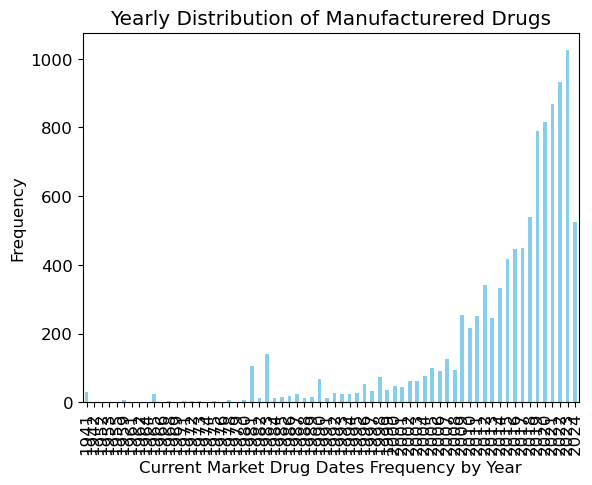

In [65]:
# Text size
plt.rcParams.update({'font.size': 12})

# Distribution of Reports
manus['year'].value_counts().sort_index().plot(kind="bar", color="skyblue")

plt.xlabel('Current Market Drug Dates Frequency by Year')
plt.ylabel('Frequency')
plt.title('Yearly Distribution of Manufacturered Drugs')
plt.show()


In [66]:
calculate_descriptives(manus['year'])

+------------------------+-----------+
| Statistic              |     Value |
+========================+===========+
| Median (Md)            | 2018      |
+------------------------+-----------+
| Mean (x-bar)           | 2014.74   |
+------------------------+-----------+
| Standard Deviation (s) |   10.8857 |
+------------------------+-----------+
| Variance (s2)          |  118.498  |
+------------------------+-----------+
| Skewness               |   -2.6561 |
+------------------------+-----------+
| First Quartile (Q1)    | 2012      |
+------------------------+-----------+
| Third Quartile (Q3)    | 2021      |
+------------------------+-----------+


### Drug Names

In [67]:
# descriptive text stat function
descriptive_stats(manus['drug_names_processed'], top_n=5, verbose=True)

There are 8528 tokens in the data.
There are 4474 unique tokens in the data.
There are 994238 characters in the data.
The lexical diversity is 0.525 in the data.
The average token length is 116.585 in the data.
The variance of token lengths is 22902.467 in the data.
The standard deviation of token lengths is 151.336 in the data.
The 5 most common tokens are [("['pregabalin']", 63), ("['ibuprofen']", 50), ("['levothyroxine sodium', 'levothyroxine', 'sodium']", 44), ("['gabapentin']", 43), ("['lamotrigine']", 37)] in the data.


[8528,
 4474,
 0.524624765478424,
 994238,
 116.58513133208255,
 22902.466955282944,
 151.33561033439204,
 [("['pregabalin']", 63),
  ("['ibuprofen']", 50),
  ("['levothyroxine sodium', 'levothyroxine', 'sodium']", 44),
  ("['gabapentin']", 43),
  ("['lamotrigine']", 37)]]

### Manufacturers/Distributors

In [68]:
# descriptive text stat function
descriptive_stats(manus['manufacturers'], top_n=5, verbose=True)

There are 8305 tokens in the data.
There are 968 unique tokens in the data.
There are 200408 characters in the data.
The lexical diversity is 0.117 in the data.
The average token length is 24.131 in the data.
The variance of token lengths is 75.467 in the data.
The standard deviation of token lengths is 8.687 in the data.
The 5 most common tokens are [("['hahnemann-laboratories']", 387), ("['bryant-ranch-prepack']", 304), ("['a-s-medication-solutions']", 172), ("['proficient-rx-']", 155), ("['boiron']", 141)] in the data.


[8305,
 968,
 0.11655629139072848,
 200408,
 24.131005418422635,
 75.46724456408865,
 8.687188530479158,
 [("['hahnemann-laboratories']", 387),
  ("['bryant-ranch-prepack']", 304),
  ("['a-s-medication-solutions']", 172),
  ("['proficient-rx-']", 155),
  ("['boiron']", 141)]]

# Combined Dataset from Master Query
## Analyzing Variable Interactions and Patterns

### All Numerical Variables

#### Correlation Martix

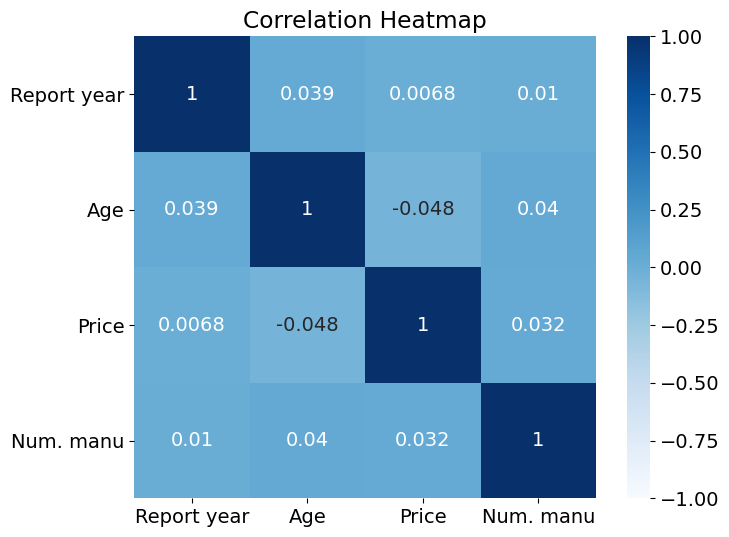

In [44]:
report_year = events_year['year']
age = events['age']
price = prices['unit_price']
num_manu = drugs['manu_num']


num_features = pd.DataFrame({
    'Report year': report_year,
    'Age': age,
    'Price': price,
    'Num. manu': num_manu
})
correlation_matrix = num_features.corr()

plt.figure(figsize=(8, 6)) 
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1, cbar=True, square=True)

plt.yticks(rotation=0)
plt.title('Correlation Heatmap')

plt.show()

In [38]:
num_features = pd.DataFrame({
    'report_year': report_year,
    'age': age,
    'price': price,
    'num_manu': num_manu
})

# Calculate the correlation matrix
correlation_matrix = num_features.corr()

In [3]:
final_data = pd.read_csv('DataLibrary/result_query_2024_withImputedprices.csv')

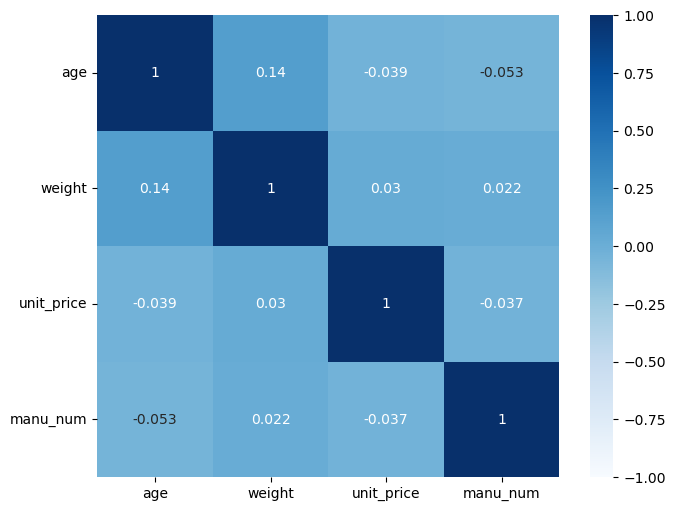

In [5]:
# matrix
num_features = final_data[['age', 'weight', 'unit_price', 'manu_num']]
correlation_matrix = num_features.corr()

plt.figure(figsize=(8, 6)) 
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1, cbar=True, square=True)

plt.yticks(rotation=0)
#plt.title('Correlation Heatmap')

plt.show()